# Week 3 Homework

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car_data.csv')
print(df.shape)
df.head(3)

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [3]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [4]:
df = df[['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp']]
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [5]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [8]:
df.engine_hp.fillna(0,inplace=True)
df.engine_cylinders.fillna(0,inplace=True)

In [10]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

## Question 1
What is the most frequent observation (mode) for the column transmission_type?

In [11]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?



In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
msrp                   int64
dtype: object

In [13]:
numerical = []

for c in df.columns:
    if df[c].dtype in ['int64', 'float64']:
        numerical.append(c)

df[numerical].head(2)

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650


In [14]:
df[numerical].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,msrp
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
msrp,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


<Axes: >

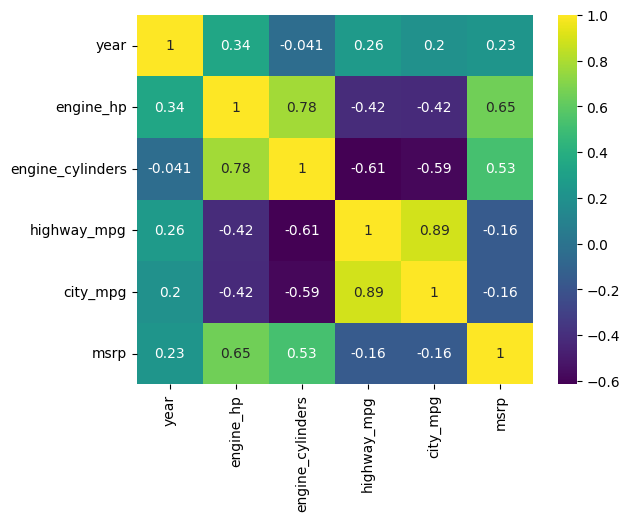

In [15]:
sns.heatmap(df[numerical].corr().round(3), annot=True, cmap='viridis')

## Make price binary
Now we need to turn the price variable from numeric into a binary format.
<br>Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [16]:
df.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650


In [17]:
df['above_average'] = df['msrp'].apply(lambda x: 1 if x > df.msrp.mean() else 0)

In [18]:
df.msrp.mean()

40594.737032063116

In [19]:
df.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1


## Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
<br>Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
<br>Make sure that the target value (above_average) is not in your dataframe.


In [20]:
data_class = df.drop(['msrp'], axis=1)
data_class.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2,random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state=42)

assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [23]:
df_train = df_train.reset_index(drop=1)
df_val = df_val.reset_index(drop=1)
df_test = df_test.reset_index(drop=1)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Question 3
Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
<br>Round the scores to 2 decimals using round(score, 2).
<br>Which of these variables has the lowest mutual information score?



In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
mutual_info_score(df_train.make, df_train.model)

3.3832256464757133

In [26]:
features = ['make', 'model', 'transmission_type', 'vehicle_style']

for f in features:
    print(f'{f}: {mutual_info_score(df_train[f], df_train.above_average).round(2)}')

make: 0.24
model: 0.46
transmission_type: 0.02
vehicle_style: 0.08


## Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
<br>What accuracy did you get?

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [52]:
numerical = []
categorical = []

for c in df_train.columns:
    if df_train[c].dtype == 'object':
        categorical.append(c)
    else:
        numerical.append(c)

print(numerical)
print(categorical)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'above_average']
['make', 'model', 'transmission_type', 'vehicle_style']


In [53]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [54]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [55]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
accuracy

1.0

## Question 5
- Let's find the least useful feature using the feature elimination technique
- Train a model with all these features (using the same parameters as in Q4)
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature
- Which of following feature has the smallest difference?

In [61]:
features = df_train.columns.to_list()
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'above_average']

In [64]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=10, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [65]:
scores

,eliminated_feature,accuracy,difference
0,make,1.000000,0.000000
1,model,1.000000,0.000000
2,year,1.000000,0.000000
3,engine_hp,0.999580,0.000420
4,engine_cylinders,0.999580,0.000420
5,transmission_type,1.000000,0.000000
6,vehicle_style,1.000000,0.000000
7,highway_mpg,1.000000,0.000000
8,city_mpg,1.000000,0.000000
9,above_average,0.947125,0.052875


In [66]:
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
0,make,1.0,0.0
1,model,1.0,0.0
2,year,1.0,0.0
5,transmission_type,1.0,0.0
6,vehicle_style,1.0,0.0
7,highway_mpg,1.0,0.0
8,city_mpg,1.0,0.0


## Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data:
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = Ridge(alpha=a, solver="sag", random_state=42)
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [69]:
df.msrp = np.log1p(df.msrp)

In [70]:
df.msrp

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

In [73]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.msrp.values
y_val = df_val.msrp.values
y_test = df_test.msrp.values

In [75]:
df_train = df_train.drop('msrp', axis=1)
df_val = df_val.drop('msrp', axis=1)
df_test = df_test.drop('msrp', axis=1)

assert 'price' not in df_train.columns
assert 'price' not in df_val.columns
assert 'price' not in df_test.columns

In [76]:
y_train.shape, y_val.shape

((7148,), (2383,))

In [77]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [80]:
scores = {}
for alpha in [0, 1e-2, 1e-1, 1, 1e1, 1e2]:
    model = Ridge(alpha=alpha, solver='sag', random_state=42)
    model.fit(X_train,y_train)

    y_pred = model.predict(X_val)

    score = mean_squared_error(y_val, y_pred, squared=False)
    scores[alpha] = round(score,3)
    print(f'alpha = {alpha}:\t RMSE = {score}')

c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0:	 RMSE = 0.4802054283932895


c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0.01:	 RMSE = 0.48020565984450214


c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 0.1:	 RMSE = 0.4802077428500999


c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 1:	 RMSE = 0.48022856953593723


c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha = 10.0:	 RMSE = 0.48043648967674507
alpha = 100.0:	 RMSE = 0.482477760163701


c:\Users\sunse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [81]:
scores

{0: 0.48, 0.01: 0.48, 0.1: 0.48, 1: 0.48, 10.0: 0.48, 100.0: 0.482}

In [82]:
print(f'The smallest `alpha` is {min(scores, key=scores.get)}.')

The smallest `alpha` is 0.
